### Artificial neural network implementation

I created a code where you the user chooses the number of layers he wants to create, and for any layer he specifies how many neurons are present. Neurons are instanstiated with activation equal to the resting potential, fixed to $V_{rest} = -65 mV$. The layers are fully connected by random connections (I changed the values during the simulations). You throw inside the code a vector with the same size of the first layer (if your first layer has 10 neurons, then the input vector has to be length=10). Then the signal is integrated through the layers, and the values of activation of any node are updated and modified. 3 functions are present in the class neural network:
* signal_stream: it processes the input through the layers and modifies the neural activation
* system_state: it prints the values of all the neurons (zero = no spike, one = spike)
* voltage_state: it prints the voltage of all neurons
* winner: it tells you which node of the last layer has the highest value


In [52]:
import math 
import array
import numpy as np
import random
resting_potential = -65 # mV
threshold = -45 #mV 

class Neuron :
    def __init__(self):
        # the initial activation value is 0 
        self.voltage = resting_potential 
        self.spike = 0 
        self.counter = 0
        
    def signal_integration(self, signal_vec,signal_weight):
        self.signal_vec = signal_vec
        self.signal_weight = signal_weight
        
        # If the neuron was firing I bring it back to non-firing condition
        if self.spike == 1:
            self.spike = 0
        
        # here I sum all the inputs 
        self.voltage =self.voltage + sum(self.signal_vec*self.signal_weight)+random.randint(-5, 5)
        # here I check if the threshold is passed
        if self.voltage>threshold:
            self.voltage = resting_potential 
            self.spike = 1 
            # this counter I will use it for assigning the most firing neuron in the last 
            #layer after the simulation
            self.counter +=1
        
class Layer:
    def __init__(self,i):
        self.n_neurons = input(f"How many neurons does layer {i+1} have: ")
        self.n_neurons = int(self.n_neurons)
        self.neuron_layer = []
        
        # each layer is made up by a certain number of neurons
        for i in range(self.n_neurons):
            self.single_neuron = Neuron()
            self.neuron_layer.append(self.single_neuron)

class connection: 
    def __init__(self,previous_layer_n,next_layer_n,min_weight,max_weight):
        self.previous_layer_n = previous_layer_n
        self.next_layer_n = next_layer_n
        self.min_weight = min_weight
        self.max_weight = max_weight
        self.matrix_connections = np.zeros((self.previous_layer_n,self.next_layer_n))
        """
        connection matrix: the number of rows is the previous layer
        the columns count for the next layer
        structure (P = previous layer, N = next layer)
        -  N1  N2  N3
        P1 
        P2 
        P3 
        P4 
        P5 
        """
        for i in range(self.previous_layer_n): #number of rows
            for j in range(self.next_layer_n): # number of columns 
                self.matrix_connections[i][j] = random.uniform(0.1,0.15)


class Network:
    def __init__(self,min_weight,max_weight):
        self.n_layers = input("How many layers does the network have: ")
        self.n_layers = int(self.n_layers)
        self.network = []
        self.n_neurons = []
        #self.activation = 0.0
        self.min_weight = min_weight
        self.max_weight = max_weight
        self.activation = [0]
        
        # Create the layers 
        for i in range(self.n_layers):
            self.single_layer = Layer(i)
            self.network.append(self.single_layer)
            self.n_neurons.append(self.single_layer.n_neurons)
            
        # Create the matrices for the connections 
        self.connections = []
        
        for i in range(self.n_layers-1):
            self.n_previous_layer = self.network[i].n_neurons
            self.n_next_layer = self.network[i+1].n_neurons
            self.single_connection = connection(self.n_previous_layer, self.n_next_layer,self.min_weight,self.max_weight)
            self.connections.append(self.single_connection.matrix_connections)
                
    def signal_stream(self,input_vec):
        
        # I take the input vector 
        self.inputs = input_vec
        # I compute the first layer update like this because it is a bit long  
        # to code and I'm lazy 
        
        for i in range(self.network[0].n_neurons):
            self.network[0].neuron_layer[i].spike = self.inputs[i]
            
        # compute the activation after the first input 
        self.activation.append(sum(neuron.spike for layer in self.network for neuron in layer.neuron_layer) / \
                          sum(len(layer.neuron_layer) for layer in self.network))
        
        # loop that considers a single layer (from the 2nd to the last layer)
        for i in range(self.n_layers-1):
            
            
            # I count how many neurons are there in the next layer 
            self.n_nneurons = self.network[i+1].n_neurons
            
            self.new_inputs = np.zeros(self.n_nneurons)
            # I select the matrix that connects the right layers (1-2, 2-3...)
            self.weight_matrix = self.connections[i]
            
            for a in range(self.n_nneurons):
                # I take the weights that correspond to a single neuron for layer i+1
                self.weight = self.weight_matrix[:,a]
                
                self.network[i+1].neuron_layer[a].signal_integration(self.inputs,self.weight)
                self.new_inputs[a] = self.network[i+1].neuron_layer[a].spike 
               
            self.inputs =self.new_inputs 
            
            self.activation.append(sum(neuron.spike for layer in self.network for neuron in layer.neuron_layer) / \
                          sum(len(layer.neuron_layer) for layer in self.network))
    
    def system_state(self):
        for i in range(self.n_layers):
            self.state_vec = np.zeros(self.network[i].n_neurons)
            for a in range(self.network[i].n_neurons):
                self.state_vec[a] = self.network[i].neuron_layer[a].spike
            print(f"Your layer {i+1} has activation values", self.state_vec)
    def voltage_state(self):
        for i in range(self.n_layers):
            self.state_vec = np.zeros(self.network[i].n_neurons)
            for a in range(self.network[i].n_neurons):
                self.state_vec[a] = self.network[i].neuron_layer[a].voltage
            print(f"Your layer {i+1} has voltage values", self.state_vec)
    
    def winner(self):
        self.counter = 0
        self.highest_val = self.network[-1].neuron_layer[0].spike
        
        for i in range(self.network[-1].n_neurons-1):
            print(self.network[-1].n_neurons)
            self.new_value = self.network[-1].neuron_layer[i+1].voltage
            if (self.new_value >self.highest_val):
                self.highest_val = self.new_value
                self.counter = i
          
            if (self.counter == 0):
                self.counter = -1
        print(f"From the last layer, the neuron with the highest value is neuron {self.counter+2}. Congrats! The picture was a cat")

Now I can create my object "Network". I have to specify how many objects "Layer" build up "Network", and how many "Neuron" build up a single layer.

In [4]:
# toy example: 
# the numbers in the parenthesis are the minimum and max value of connections 
toy_network = Network(0,1)
# this is to get the state of the network: which neuron is firing at a given timestep
toy_network.system_state()
# this refers to the voltage of the whole network
toy_network.voltage_state()
# here I create a random vector of 0s or 1s (size = same size of the first network layer)
input_vec= np.random.randint(2, size=5)
# here I run the network "bursting"
toy_network.signal_stream(input_vec)

# here I check how the previous values changed
toy_network.system_state()
toy_network.voltage_state()

How many layers does the network have: 3
How many neurons does layer 1 have: 5
How many neurons does layer 2 have: 4
How many neurons does layer 3 have: 3
Your layer 1 has activation values [0. 0. 0. 0. 0.]
Your layer 2 has activation values [0. 0. 0. 0.]
Your layer 3 has activation values [0. 0. 0.]
Your layer 1 has voltage values [-65. -65. -65. -65. -65.]
Your layer 2 has voltage values [-65. -65. -65. -65.]
Your layer 3 has voltage values [-65. -65. -65.]
Your layer 1 has activation values [0. 1. 0. 0. 1.]
Your layer 2 has activation values [0. 0. 0. 0.]
Your layer 3 has activation values [0. 0. 0.]
Your layer 1 has voltage values [-65. -65. -65. -65. -65.]
Your layer 2 has voltage values [-64.77092382 -64.75990214 -64.71482547 -64.76766209]
Your layer 3 has voltage values [-65. -65. -65.]


In [32]:
type(toy_network.activation)

list

#### Proper definition

Before proceeding, I give details over several aspects of the network we're modeling:
0. Observation frame: the system is a series of neural layers. it receives inputs (so far random) and as output I compute the overall activity at a given point 
1. I/O behavior: the input is a random vector of 0s and 1s. The output is the activity of the network (how many neurons spike at a given time/n of whole network)
2. I/O functions: initial state is set as following. All neurons are at resting state (-65 mV). I tune the connection strength between 0-0.1 interval until 0.9-1. I see the output as whole network activity. 
3. State transition: inputs depolarize the first layer which by cascade depolarizes the next layers. 
4. Complex component: 

#### Some implementation

Now I want to implement a vector (with a greater size: 5 layers, 50 neurons each), and I want to modify the $\theta$ parameter of connections strength. I will go from 0-0.1 weights to 0.9-1 weights intervals. Then I will plot the network activity as the weights get modified. My time step is 100 timesteps. At each timestep a vector of size 50 is plug at the first layer of the network. The vectors contains randomly 0s and 1s. 

In [62]:
##### put 5 layers, first layer = 50, other 4 length = 500

timer = [0]
network = Network(0,1)
inputs_number = 100
time_interval = 5 #ms/layer 
n_layers = network.n_layers
T = n_layers * time_interval*inputs_number
time_steps = np.arange(0, T+time_interval, time_interval)
network_activity_0_1 = np.full(inputs_number*2, None)
for i in range(inputs_number):
    input_vec = [random.randint(0, 1) for _ in range(50)]
    network.signal_stream(input_vec)
    network_activity_0_1[i] = network.activation[-1]
    
for a in range(inputs_number):
    input_vec = [0 for _ in range(50)]
    network.signal_stream(input_vec)
    network_activity_0_1[a+inputs_number] = network.activation[-1]   

How many layers does the network have: 5
How many neurons does layer 1 have: 50
How many neurons does layer 2 have: 500
How many neurons does layer 3 have: 500
How many neurons does layer 4 have: 500
How many neurons does layer 5 have: 500


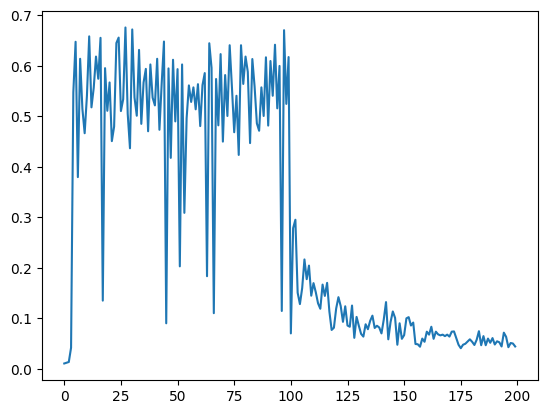

In [63]:
plt.plot(network_activity_0_1)

ValueError: setting an array element with a sequence.

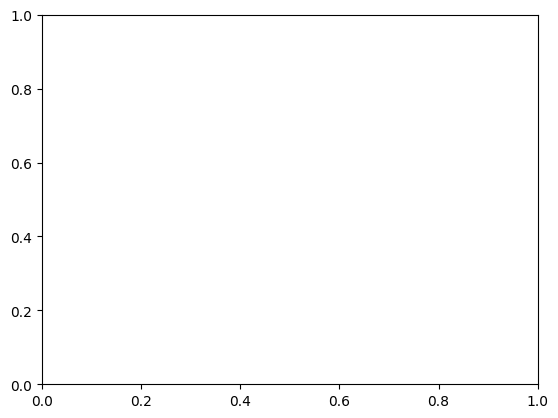

In [30]:
network_activity_0_1_vec=network_activity_0_1.flatten()
plt.plot(network_activity_0_1_vec)

In [19]:

network_activity_0_1_vec = np.array(network_activity_0_1)

ValueError: setting an array element with a sequence.

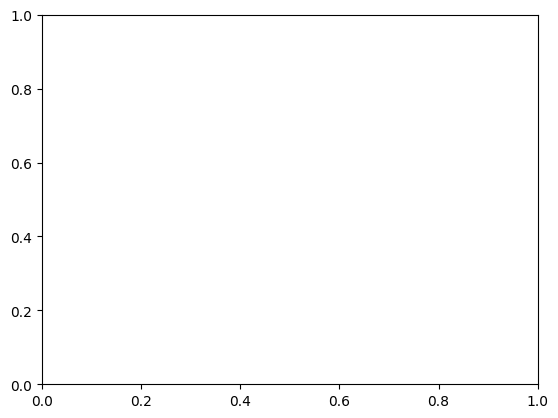

In [21]:
plt.plot(network_activity_0_1)

ValueError: x and y must have same first dimension, but have shapes (401,) and (1001,)

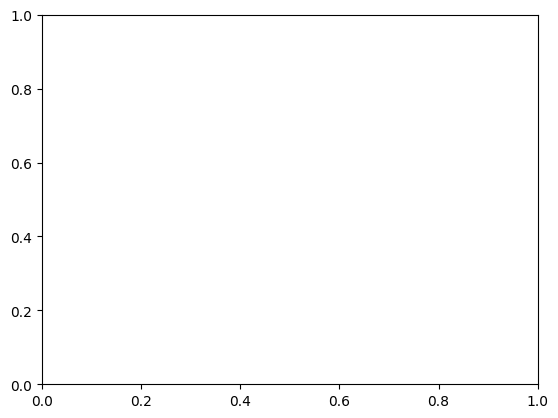

In [12]:
import matplotlib.pyplot as plt
plt.plot(timer,network.activation)


In [208]:
network = Network(0.1,0.2)
inputs_number = 100
network_activity_1_2 = np.full(inputs_number, None)
for i in range(inputs_number):
    input_vec = [random.randint(0, 1) for _ in range(50)]
    network.signal_stream(input_vec)
    network_activity_1_2[i] = network.activation 

How many layers does the network have: 5
How many neurons does layer 1 have: 50
How many neurons does layer 2 have: 50
How many neurons does layer 3 have: 50
How many neurons does layer 4 have: 50
How many neurons does layer 5 have: 50


In [209]:
network = Network(0.2,0.3)
inputs_number = 100
network_activity_2_3 = np.full(inputs_number, None)
for i in range(inputs_number):
    input_vec = [random.random() for _ in range(50)]
    network.signal_stream(input_vec)
    network_activity_2_3[i] = network.activation 

How many layers does the network have: 5
How many neurons does layer 1 have: 50
How many neurons does layer 2 have: 50
How many neurons does layer 3 have: 50
How many neurons does layer 4 have: 50
How many neurons does layer 5 have: 50


In [210]:
network = Network(0.3,0.4)
inputs_number = 100
network_activity_3_4 = np.full(inputs_number, None)
for i in range(inputs_number):
    input_vec = [random.random() for _ in range(50)]
    network.signal_stream(input_vec)
    network_activity_3_4[i] = network.activation 

How many layers does the network have: 5
How many neurons does layer 1 have: 50
How many neurons does layer 2 have: 50
How many neurons does layer 3 have: 50
How many neurons does layer 4 have: 50
How many neurons does layer 5 have: 50


(0.0, 1.0)

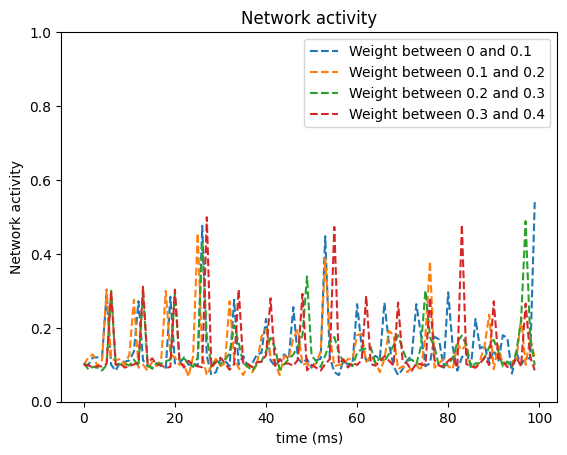

In [211]:
import matplotlib.pyplot as plt

indices = range(len(network_activity_0_3))
plt.plot(indices, network_activity_0_1,label='Weight between 0 and 0.1',linestyle='dashed')
plt.plot(indices, network_activity_1_2,label='Weight between 0.1 and 0.2',linestyle='dashed')
plt.plot(indices, network_activity_2_3,label='Weight between 0.2 and 0.3',linestyle='dashed')
plt.plot(indices, network_activity_3_4,label='Weight between 0.3 and 0.4',linestyle='dashed')
plt.xlabel('time (ms)')
plt.ylabel('Network activity')
plt.title('Network activity')
plt.legend()
plt.ylim(0, 1)
